## Exploratory data analysis (EDA): feature engineering and feature selection

**Author:** Y.X. Wu


In [15]:
from utils.FeatureCalculator import FeatureCalculator
import numpy as np
import pandas as pd
import os

# display the current working directory
display("Current working directory: {0}".format(os.getcwd()))

data_path = '../Dataset_Cleaned/'
display(os.path.isfile(data_path+'LiteratureDataset_Corrosion_YW_v3.xlsx'))

'Current working directory: /Users/ywu/InSync/2021_MPIE/2021-12_H Diffusion/ANN model/CCA-representation-ML/Dataset_EDA_Pairplot_Feature_PCA_Mahalanobis'

True

### Feature Calculation for Alloy Components

Prepares and processes data about alloy compositions, specifically it creates a `FeatureCalculator` object from the defined compositions, then calculates and prints the corresponding alloy features.


In [28]:
# Define a list of component elements and their corresponding fractions
compo_elem = ["Ni", "Cr", "Mo", "Ti", "Fe"]
ele_frac = np.array([43.8, 38.3, 2.44, 1.04, 0])

# Create a dictionary mapping each element to its corresponding fraction,
ele_frac_dict = {elem: frac for elem, frac in zip(compo_elem, ele_frac)}

# Prepare data in the format required for FeatureCalculator - a list of tuples,
# where each tuple contains a list of elements and their corresponding fractions
compositions = [(list(ele_frac_dict.keys()), list(ele_frac_dict.values()))]

print(compositions)

# Create a FeatureCalculator object with the prepared compositions
calculator = FeatureCalculator(compositions)

# Calculate the features using the FeatureCalculator object
features = calculator.calculate_features()


feature_names = ["a", "delta_a", "Tm", "sigma_Tm", "Hmix", "sigma_Hmix", "ideal_S",
                 "elec_nega", "sigma_elec_nega", "VEC", "sigma_VEC", "bulk_modulus", "sigma_bulk_modulus"]
# tabulate the features the feature under feature_names
df = pd.DataFrame(features, columns=feature_names)
display(df)

[(['Ni', 'Cr', 'Mo', 'Ti', 'Fe'], [43.8, 38.3, 2.44, 1.04, 0.0])]


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,107.2577,9.142849,168265.28,1.538426e+06,-57496.7136,2.548918e+06,-307.385957,154.108,1408.986741,686.6,6277.508272,1.468760e+13,134286.583047


### Data Loading, Feature Calculation, and Extraction

Reads various datasets from Excel files, calculates specific features for each material composition in these datasets using a custom `FeatureCalculator` class, extracts relevant data from the corrosion and hardness datasets, and displays the first rows of the extracted data.


In [17]:
import pandas as pd
from utils.FeatureCalculator import FeatureCalculator

# Initialization of the constants and the data to be loaded
feature_names = ["a", "delta_a", "Tm", "sigma_Tm", "Hmix", "sigma_Hmix", "ideal_S",
                 "elec_nega", "sigma_elec_nega", "VEC", "sigma_VEC", "bulk_modulus", "sigma_bulk_modulus"]

# Lists of filenames, elements for each file, and the header rows for the data in each file
data_file_names = ["LiteratureDataset_Corrosion_YW_v3.xlsx",
                   "LiteratureDataset_Hardness_YW_v3.xlsx",
                   "MultiTaskModel_NiCrCoVFe_KW99_at_pct.xlsx",
                   "MultiTaskModel_NiCrCoVFe_KW99_wt_pct.xlsx",
                   "MultiTaskModel_NiCrMoTiFe_KW131_at_pct.xlsx",
                   "MultiTaskModel_NiCrMoTiFe_KW131_wt_pct.xlsx"]
element_columns = [['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                    'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y'],
                   ['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                    'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'],
                   ['Ni', 'Cr', 'Co', 'V', 'Fe'],
                   ['Ni', 'Cr', 'Co', 'V', 'Fe'],
                   ['Ni', 'Cr', 'Mo', 'Ti', 'Fe'],
                   ['Ni', 'Cr', 'Mo', 'Ti', 'Fe']]

df_header_list = [2, 2, 0, 0, 0, 0, 0, 0]
df_compo = pd.DataFrame(columns=['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                                 'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'])
features_dfs = []

# Processing each data file along with the corresponding elements
for i in range(len(data_file_names)):
    # Load and preprocess data from each excel file
    data_df = pd.read_excel(
        data_path + data_file_names[i], header=df_header_list[i])
    # print(data_df.columns)
    element_fractions = data_df[element_columns[i]].fillna(0)

    # Calculate features for each composition
    compositions = [(element_columns[i], element_fraction)
                    for element_fraction in element_fractions.values]
    feature_calculator = FeatureCalculator(compositions)
    calculated_features = feature_calculator.calculate_features()

    # Store the calculated features in a DataFrame
    features_df = pd.DataFrame(calculated_features, columns=feature_names)
    features_dfs.append(features_df)

    # Extract and store specific data and features for the corrosion and hardness datasets
    if i == 0:  # Corrosion dataset
        df_C_compo, df_C_specific_testing, df_C_specific_features, df_C_output = element_fractions, data_df[[
            'TestTemperature_C', 'ChlorideIonConcentration', 'pH', 'ScanRate_mVs']], features_df, data_df[['AvgPittingPotential_mV']]

        # now I want to make df_C_compo have the same columns as df_compo
        df_C_compo = pd.concat([df_C_compo, df_compo],
                               axis=0, ignore_index=True).fillna(0)
        display(df_C_compo.head(1))

    if i == 1:  # Hardness dataset
        df_H_compo, df_H_specific_features, df_H_output = element_fractions, features_df, data_df[[
            'converted HV']]
        df_H_compo = pd.concat([df_H_compo, df_compo],
                               axis=0, ignore_index=True).fillna(0)
        display(df_H_compo.head(1))


# Display the first row of the specific data, features, and output for the corrosion and hardness datasets
display(df_C_compo.head(1), df_C_specific_testing.head(1),
        df_C_specific_features.head(1), df_C_output.head(1))
display(df_H_compo.head(1), df_H_specific_features.head(1), df_H_output.head(1))

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,0.0,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


,TestTemperature_C,ChlorideIonConcentration,pH,ScanRate_mVs
0,50.0,0.005133,7.8,0.1


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,124.30836,9.9,186465.714,1.846011e+06,-29725.004,1.441756e+06,-370.81335,180.5656,1787.599615,779.48,7716.860233,1.678989e+13,166219.942589


,AvgPittingPotential_mV
0,287.0


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,0.0,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,126.69848,9.900001,179579.93,1.777843e+06,-42038.7456,2.657898e+06,-299.679129,177.0884,1753.175704,806.21,7981.49141,1.625460e+13,160920.693702


,converted HV
0,140.913294


### Visualizing Correlation Matrix and Correlation with the Target Variable

Generates two visuals: a heatmap showing the correlation between all features in the data set, and a bar chart indicating the correlation of each feature with the target variable, 'AvgPittingPotential_mV'. These visuals help in identifying the relationships between different features, and how each one impacts the target variable.


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus,AvgPittingPotential_mV
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,...,-29725.004,1.441756e+06,-370.81335,180.5656,1787.599615,779.48,7716.860233,1.678989e+13,166219.942589,287.0


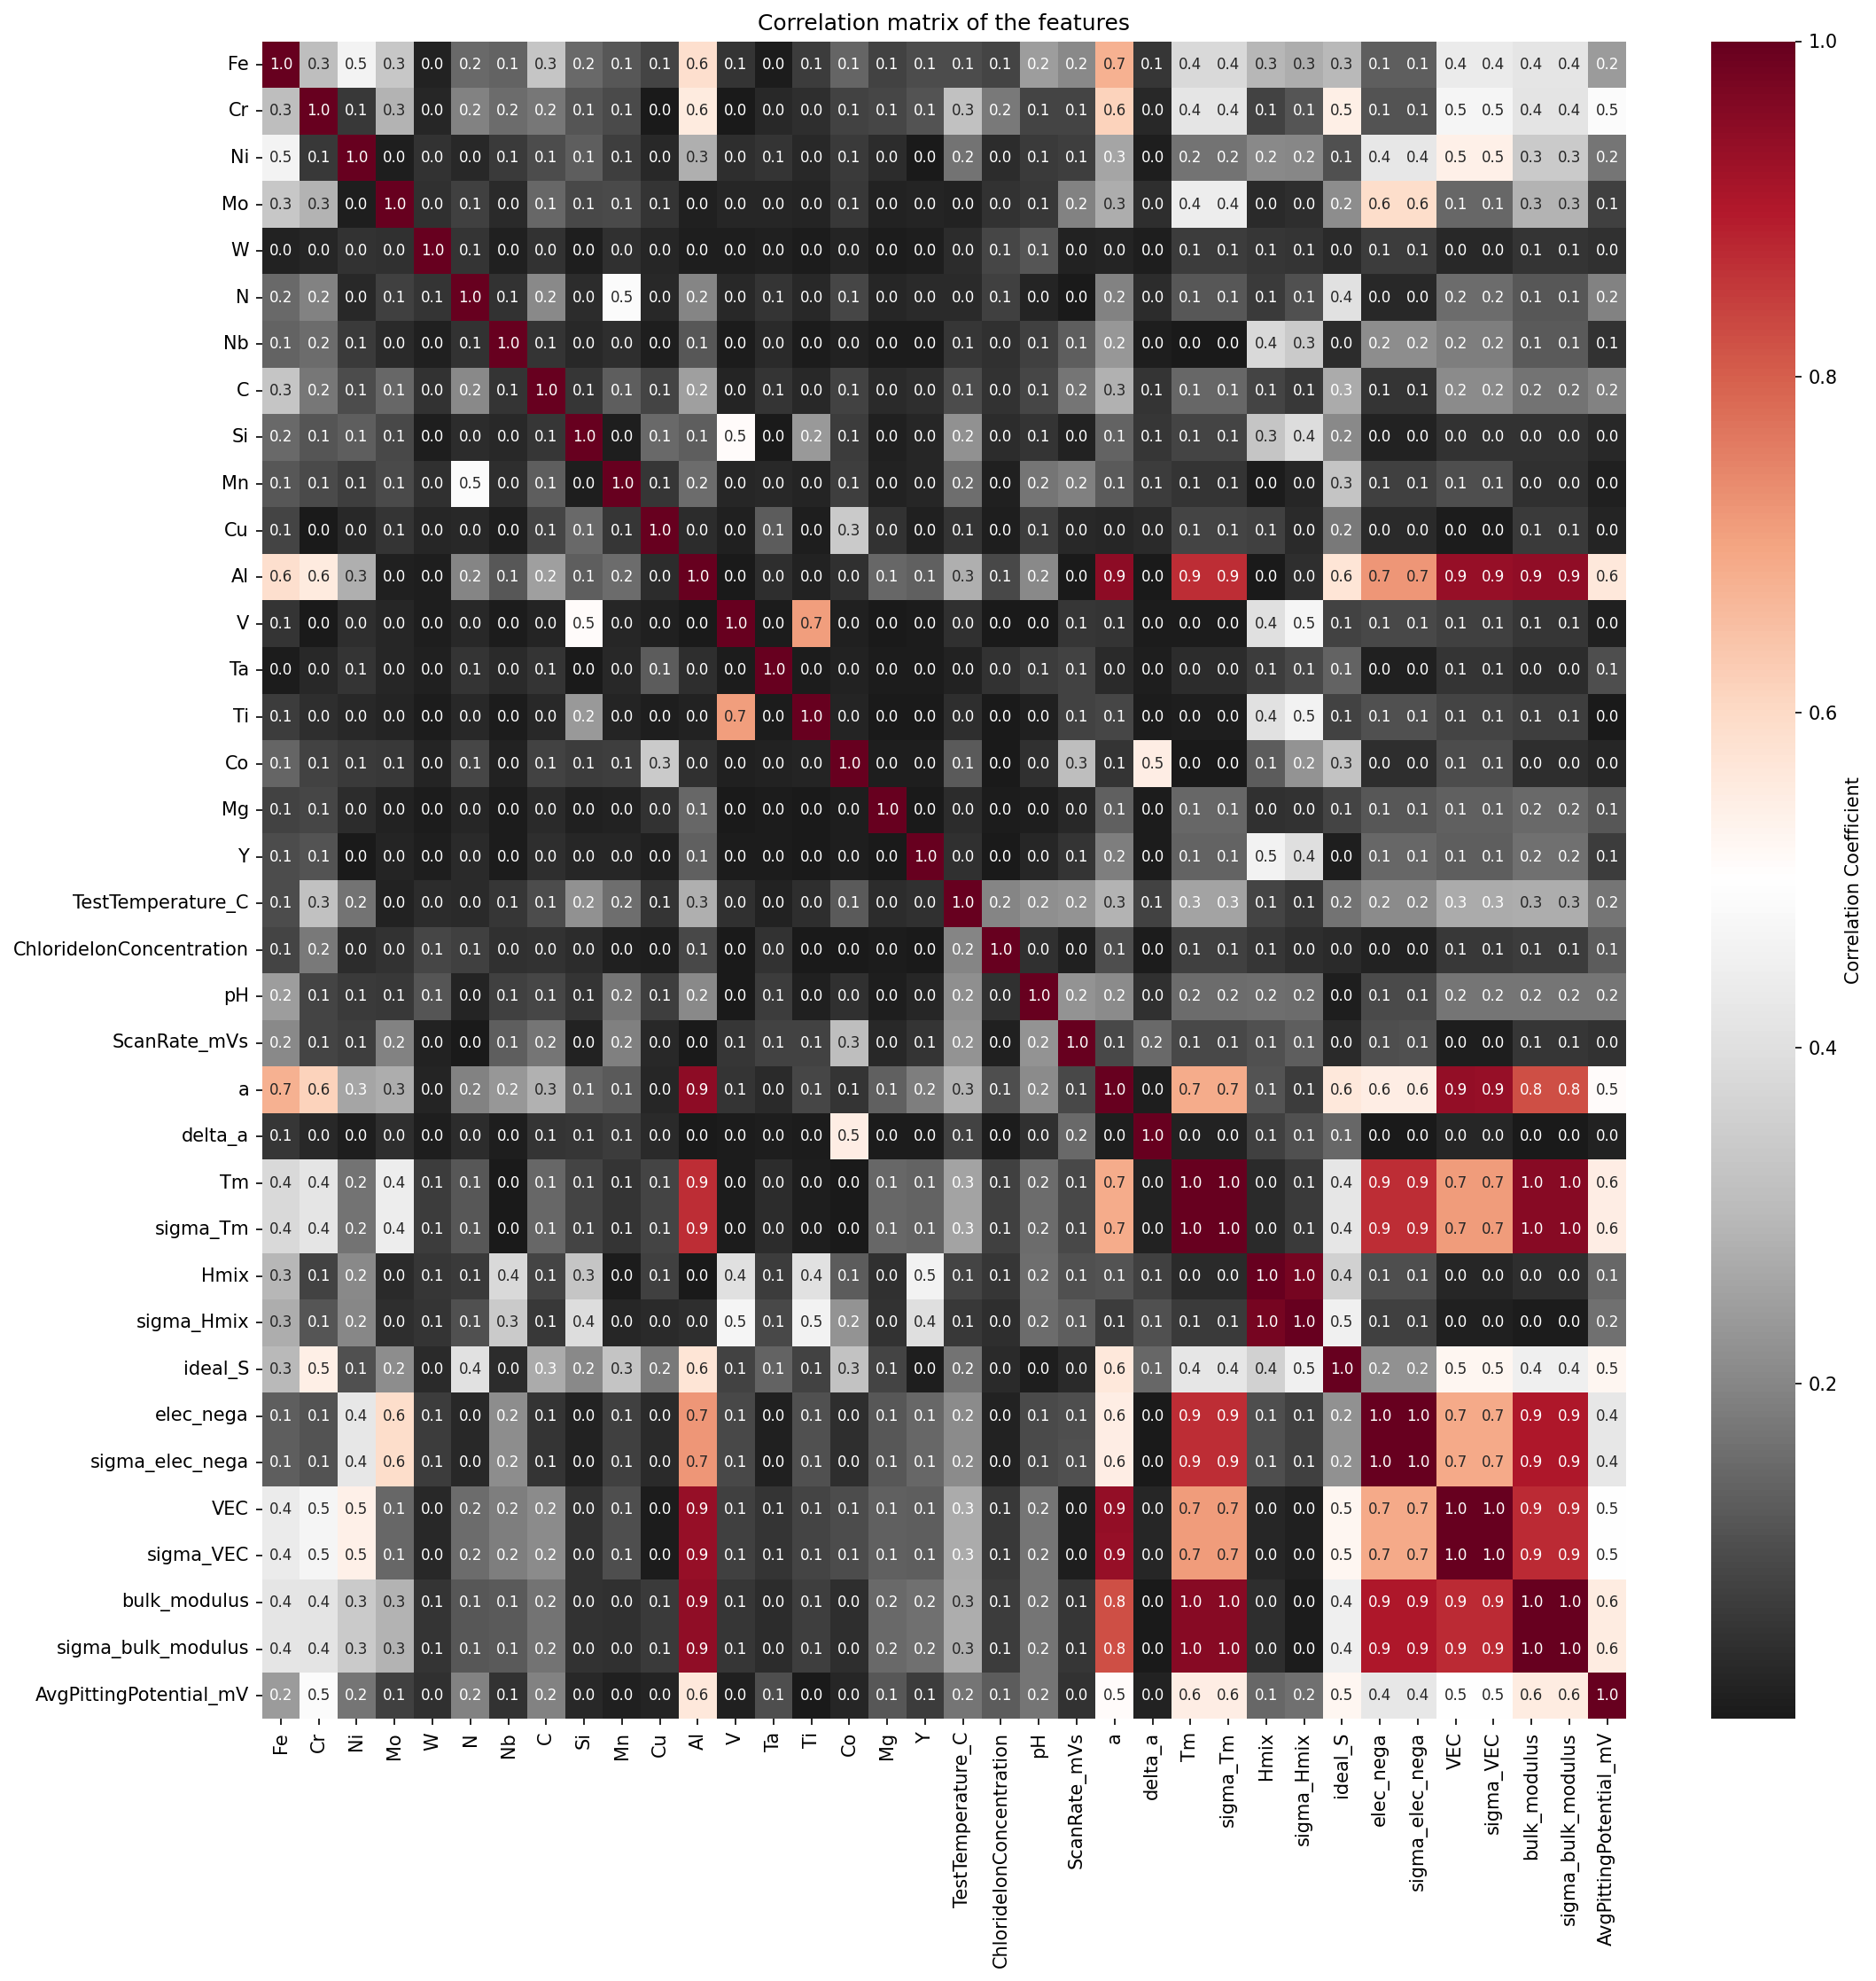

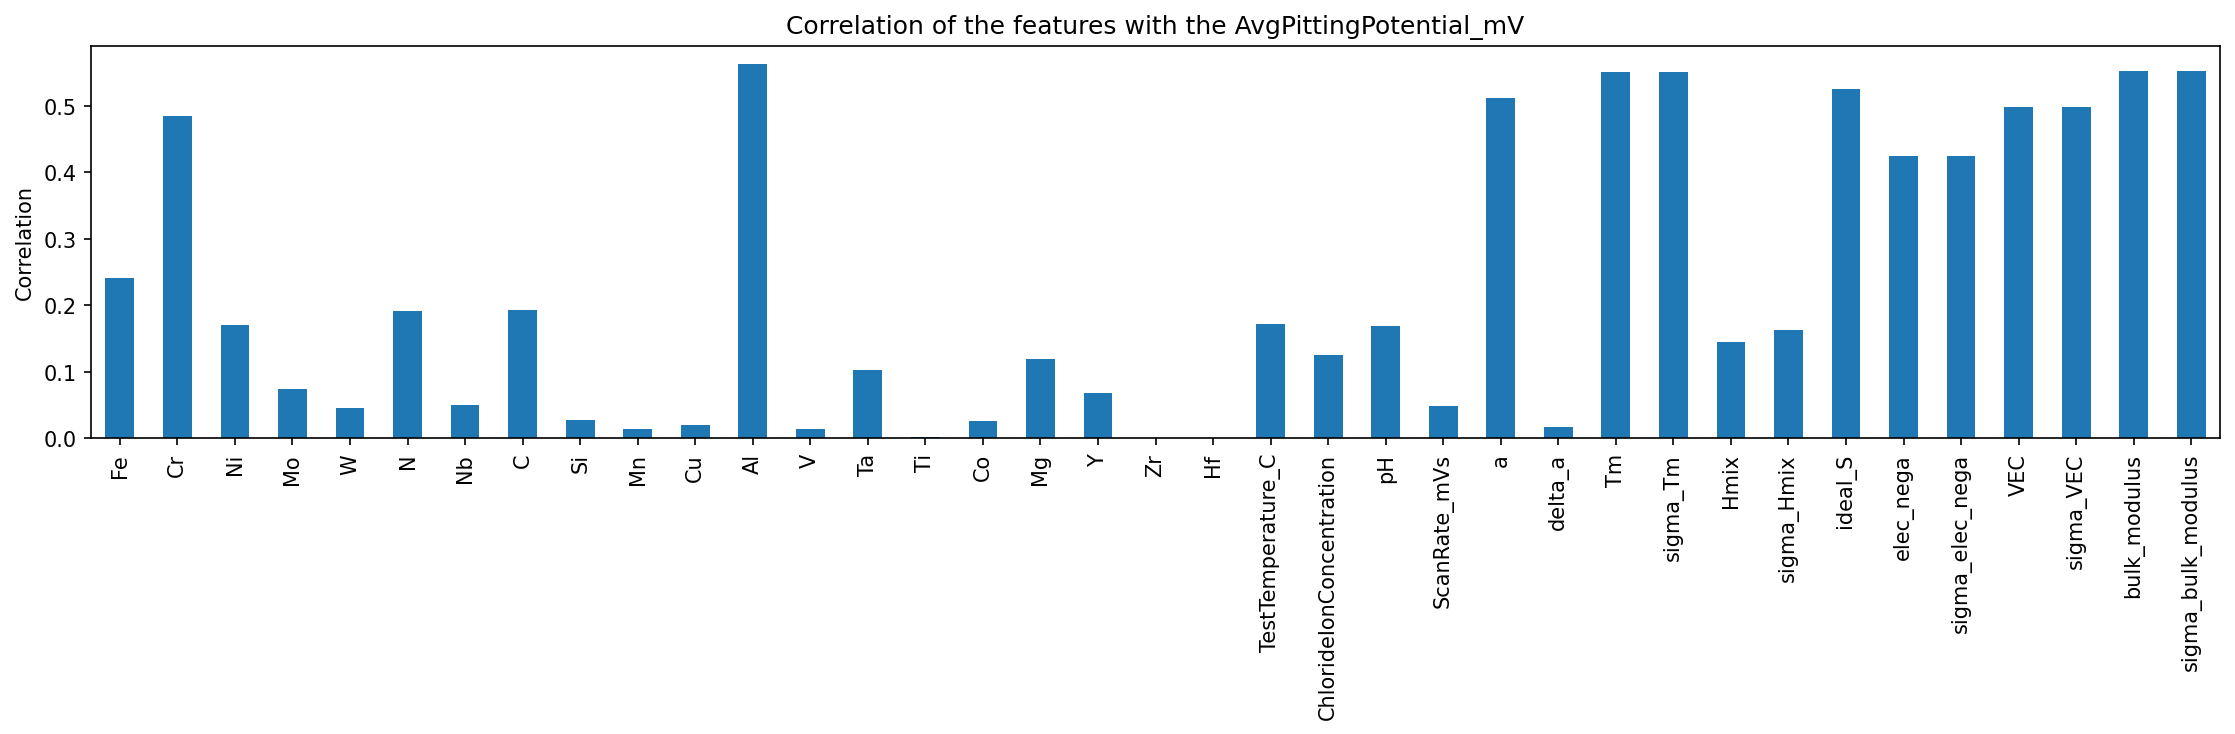

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate DataFrames
df_C = pd.concat([df_C_compo, df_C_specific_testing,
                 df_C_specific_features, df_C_output], axis=1)
display(df_C.head(1))

# Compute absolute correlation matrix
corr_matrix = df_C.corr().abs()

# Remove NaN columns and rows
corr_matrix = corr_matrix.loc[:, ~corr_matrix.isna().all(axis=0)]
corr_matrix = corr_matrix.loc[~corr_matrix.isna().all(axis=1), :]

# Plot correlation heatmap
plt.figure(figsize=(15, 15), dpi=150)
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='RdGy_r',
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": 8})
plt.title("Correlation matrix of the features")
plt.tight_layout()
plt.show()

# Compute and plot correlations with the target variable
plt.figure(figsize=(15, 5), dpi=150)
df_C.drop('AvgPittingPotential_mV', axis=1).apply(lambda x: x.corr(
    df_C['AvgPittingPotential_mV'])).abs().plot(kind='bar')
plt.title("Correlation of the features with the AvgPittingPotential_mV")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

## Feature selection: Recursive feature elimination based on Random Forest Regression model

### Data Normalization

performs MinMax scaling on multiple datasets to prepare them as inputs for a Neural Network, concatenates certain scaled datasets for model training


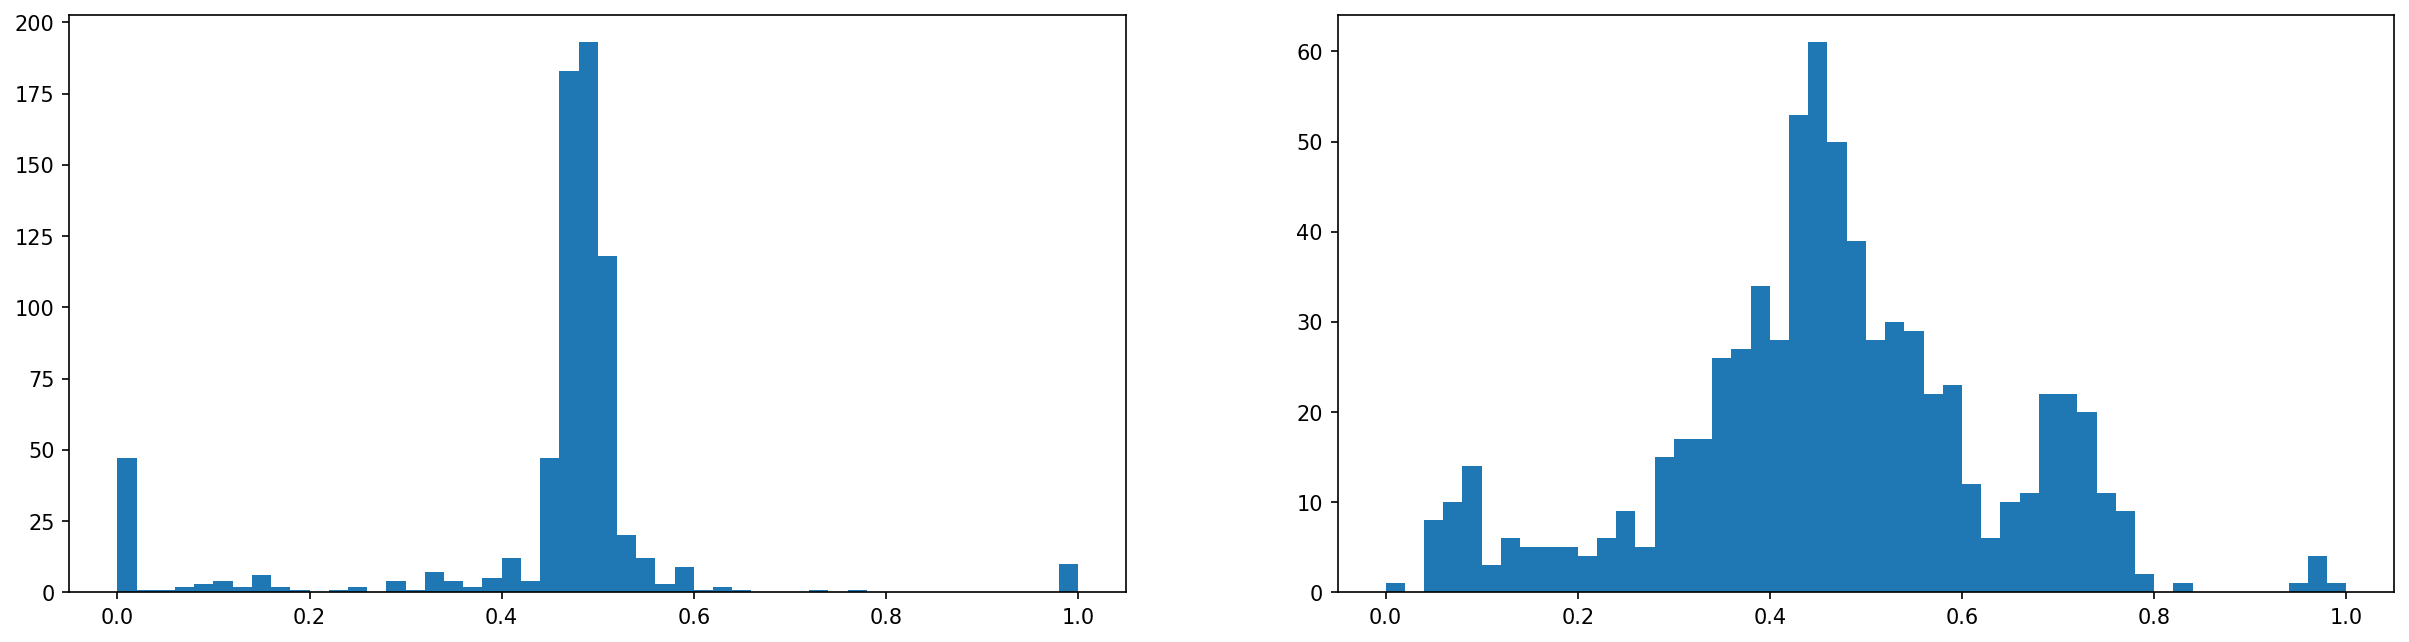

In [40]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Prepare data for NN
dfs = [df_H_compo, df_H_specific_features, df_H_output,
       df_C_compo, df_C_specific_testing, df_C_specific_features, df_C_output]

# Convert DataFrames to numpy arrays
inputs_outputs = [np.asarray(df.values) for df in dfs]

# Define each variable
X1, Y1, H1, X2, Z2, W2, C2 = inputs_outputs

# Initialize MinMaxScalers for each data set
scalers = {
    "compo": MinMaxScaler(),
    "H_specific_features": MinMaxScaler(),
    "H_output": MinMaxScaler(),
    "C_specific_testing": MinMaxScaler(),
    "C_specific_features": MinMaxScaler(),
    "C_output": MinMaxScaler()
}

# Fit scalers to appropriate data
scalers["compo"].fit(np.concatenate((X1, X2)))
scalers["H_specific_features"].fit(Y1)
scalers["H_output"].fit(H1.reshape((-1, 1)))
scalers["C_specific_testing"].fit(Z2)
scalers["C_specific_features"].fit(W2)
scalers["C_output"].fit(C2.reshape((-1, 1)))

# Apply transformations
X1_norm = scalers["compo"].transform(X1)
Y1_norm = scalers["H_specific_features"].transform(Y1)
H1_norm = scalers["H_output"].transform(H1.reshape((-1, 1)))
X2_norm = scalers["compo"].transform(X2)
Z2_norm = scalers["C_specific_testing"].transform(Z2)
W2_norm = scalers["C_specific_features"].transform(W2)
C2_norm = scalers["C_output"].transform(C2.reshape((-1, 1)))

# Prepare final input data for model training
X_H_norm = np.concatenate((X1_norm, Y1_norm), axis=1)
X_C_norm = np.concatenate((X2_norm, Z2_norm, W2_norm), axis=1)

# Plot distribution of target variables
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(1, 2, 1)
plt.hist(W2_norm[:, 2], bins=50)  # Distribution of one of the features
plt.subplot(1, 2, 2)
plt.hist(C2_norm, bins=50)  # Distribution of target variable
plt.show()

### Building and Evaluating Random Forest Regression Models

Builds two Random Forest Regression models for different datasets, fits the models to the data, and then evaluates their performance by printing the R^2 score


In [55]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create a Random Forest model
forestmodel_H = RandomForestRegressor(random_state=0,
                                      n_estimators=300,
                                      max_features=20,
                                      max_depth=10,
                                      min_samples_split=2,
                                      min_samples_leaf=4,
                                      bootstrap=True)
# print(forestmodel_H)

forestmodel_H.fit(X_H_norm, H1_norm.ravel())

# Perform cross-validation on model H
cv_scores_H = cross_val_score(forestmodel_H, X_H_norm, H1_norm.ravel(), cv=6)
print("CV scores for H:", cv_scores_H)
print("Mean CV score for H:", np.mean(cv_scores_H))

forestmodel_C = RandomForestRegressor(random_state=0,
                                      n_estimators=300,
                                      max_features=20,
                                      max_depth=10,
                                      min_samples_split=2,
                                      min_samples_leaf=4,
                                      bootstrap=True
                                      )
forestmodel_C.fit(X_C_norm, C2_norm.ravel())

# Perform cross-validation on model C
cv_scores_C = cross_val_score(forestmodel_C, X_C_norm, C2_norm.ravel(), cv=6)
print("CV scores for C:", cv_scores_C)
print("Mean CV score for C:", np.mean(cv_scores_C))

# # Evaluate the fitting of the model
# print("R2 score for H:", forestmodel_H.score(X_H_norm, H1_norm))
# print("R2 score for C:", forestmodel_C.score(X_C_norm, C2_norm))

CV scores for H: [0.4886384  0.57018218 0.41303227 0.5430046  0.36029063 0.54561106]
Mean CV score for H: 0.48679318891755824
CV scores for C: [ 0.60292244 -0.1197444   0.14077487  0.35833116 -0.72951616  0.24674184]
Mean CV score for C: 0.08325162456083808


In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20],  # the maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # the minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # the minimum number of samples required to be at a leaf node
    'n_estimators': [100, 200, 300],  # the number of trees
}

# Create a base model
rf = RandomForestRegressor(random_state=0)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_H_norm, H1_norm.ravel())

# Print the best parameters
print(grid_search.best_params_)

# Create a Random Forest model with the best parameters
forestmodel_H = grid_search.best_estimator_


print("R2 score for H:", forestmodel_H.score(X_H_norm, H1_norm))


{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
R2 score for H: 0.8319037079847617


### Permutation feature importance


In [21]:
def evaluate_feature_importance(model, X, y):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    return result.importances_mean, result.importances_std


# Calculate feature importances and their standard deviations
importances_H, std_H = evaluate_feature_importance(
    forestmodel_H, X_H_norm, H1_norm.ravel())
importances_C, std_C = evaluate_feature_importance(
    forestmodel_C, X_C_norm, C2_norm.ravel())

feature_names_H = df_H_compo.columns.append(
    df_H_specific_features.columns).tolist()
feature_names_C = df_C_compo.columns.append(
    df_C_specific_testing.columns).append(df_C_specific_features.columns).tolist()

# now create a dataframe of feature importance and std with the column names of feature names
# Create a dataframe for C
df_feature_importance_C = pd.DataFrame(
    importances_C.reshape(1, -1), columns=feature_names_C)
df_feature_importance_C = pd.concat([df_feature_importance_C, pd.DataFrame(
    std_C.reshape(1, -1), columns=feature_names_C)], axis=0)
df_feature_importance_C.index = ['importance', 'std_dev']
display(df_feature_importance_C)

# Create a dataframe for H
df_feature_importance_H = pd.DataFrame(
    importances_H.reshape(1, -1), columns=feature_names_H)
df_feature_importance_H = pd.concat([df_feature_importance_H, pd.DataFrame(
    std_H.reshape(1, -1), columns=feature_names_H)], axis=0)
df_feature_importance_H.index = ['importance', 'std_dev']
display(df_feature_importance_H)

# match the feature importance with the feature names
df_feature_importance_H_full = pd.DataFrame(columns=feature_names_C)
df_feature_importance_H_full = pd.concat(
    [df_feature_importance_H_full, df_feature_importance_H], axis=0)
df_feature_importance_H_full.index = df_feature_importance_H.index
display(df_feature_importance_H_full)

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
importance,0.01988,0.043201,0.006022,0.059071,0.001892,0.013995,0.001759,0.009630,0.07728,0.010786,...,0.049718,0.024056,0.017562,0.137309,0.009019,0.009470,0.012204,0.010106,0.024439,0.018574
std_dev,0.00167,0.002446,0.000512,0.006021,0.000212,0.000941,0.000130,0.000981,0.00804,0.000712,...,0.003571,0.001935,0.000931,0.010515,0.000658,0.001123,0.001695,0.001426,0.002318,0.001541


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
importance,0.013579,0.014578,0.009966,0.013478,0.001256,0.0,0.006654,0.000197,0.002218,0.069334,...,0.008594,0.100124,0.028760,0.056321,0.011308,0.015261,0.121658,0.087933,0.004897,0.006231
std_dev,0.001163,0.001407,0.001156,0.001211,0.000127,0.0,0.000868,0.000007,0.000400,0.007194,...,0.000839,0.007588,0.002278,0.006454,0.000940,0.001501,0.007893,0.006737,0.000535,0.000655


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
importance,0.013579,0.014578,0.009966,0.013478,0.001256,0.0,0.006654,0.000197,0.002218,0.069334,...,0.008594,0.100124,0.028760,0.056321,0.011308,0.015261,0.121658,0.087933,0.004897,0.006231
std_dev,0.001163,0.001407,0.001156,0.001211,0.000127,0.0,0.000868,0.000007,0.000400,0.007194,...,0.000839,0.007588,0.002278,0.006454,0.000940,0.001501,0.007893,0.006737,0.000535,0.000655


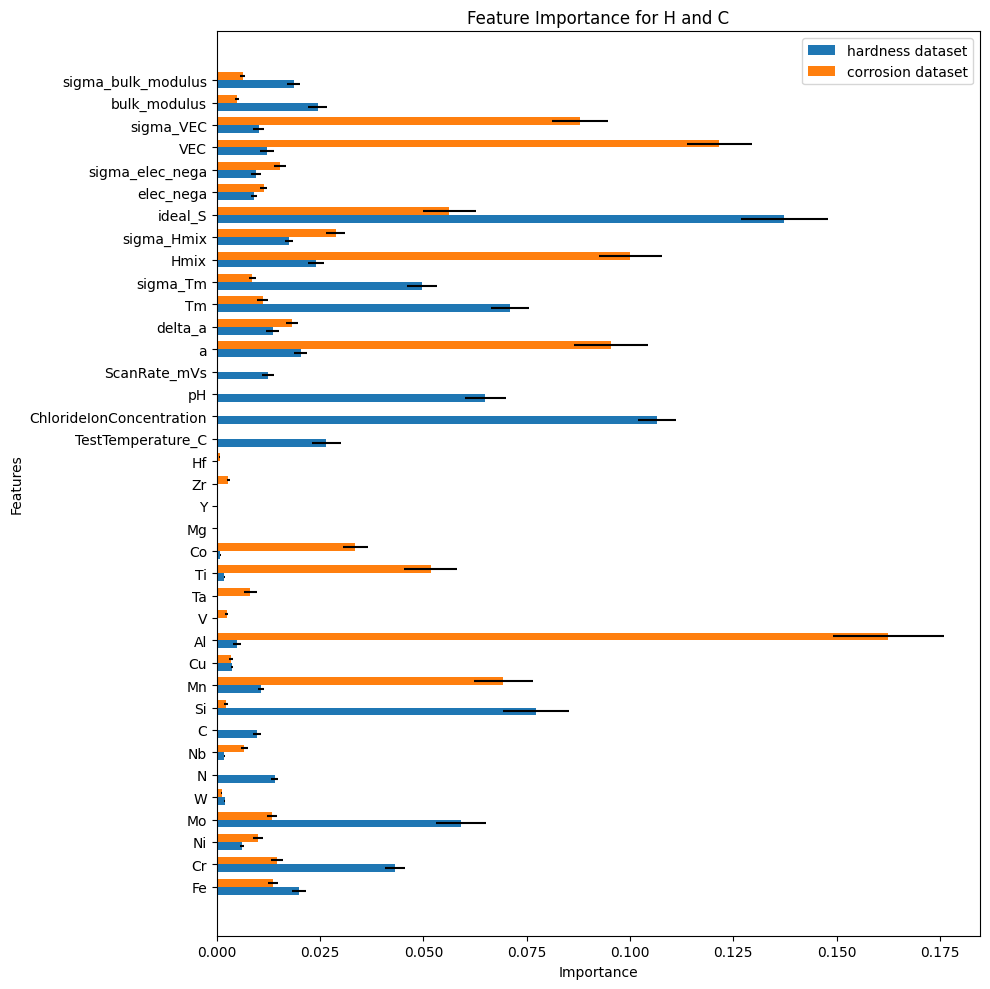

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
# Define bar width
bar_width = 0.35
index = np.arange(len(df_feature_importance_C.columns))

bar1 = ax.barh(index - bar_width / 2,
               df_feature_importance_C.loc['importance', :],
               bar_width,
               xerr=df_feature_importance_C.loc['std_dev', :],
               label='hardness dataset')
bar2 = ax.barh(index + bar_width / 2,
               df_feature_importance_H_full.loc['importance', :],
               bar_width,
               xerr=df_feature_importance_H_full.loc['std_dev', :],
               label='corrosion dataset')
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
ax.set_title('Feature Importance for H and C')
ax.set_yticks(index)
ax.set_yticklabels(df_feature_importance_C.columns)
ax.legend()

fig.tight_layout()
plt.show()

### Recursive Feature Elimination (RFE) - a customised version


In [23]:
# from sklearn.feature_selection import RFE

# # Let's say these are your full features and you have a list defining the group of features
# # you're interested in, like this:

# all_features_C = np.array(df_C_compo.columns.to_list(
# ) + df_C_specific_testing.columns.to_list() + df_C_specific_features.columns.to_list())  # all features
# # the specific group of features
# group_features_C = np.array(df_C_specific_features.columns.to_list())

# # Get the indices of the group features in the full feature list
# group_indices_C = np.where(np.isin(all_features_C, group_features_C))[0]

# # Now extract the subset of X corresponding to group features
# X_C_norm_subset = X_C_norm[:, group_indices_C]

# # Now you can run RFE or any other feature selection method on this subset
# rfe_C = RFE(estimator=forestmodel_C, n_features_to_select=5)
# rfe_C = rfe_C.fit(X_C_norm_subset, C2_norm.ravel())
# X_C_norm_subset_rfe = rfe_C.transform(X_C_norm_subset)

# # Get a mask, or integer index, of the features selected
# selected_features_C = rfe_C.support_

# # Get a list of the feature names selected
# selected_feature_names = group_features_C[selected_features_C]
# print(selected_feature_names)

In [24]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE
# import numpy as np

# # Assuming X_train is your feature matrix and y_train are your labels
# # always_include is a list of indices for the features you always want to include

# # replace these with the indices of your features
# always_include_indices = [0, 2, 5]
# include_X_train = X_train[:, always_include_indices]

# # Remaining features for RFE
# rfe_indices = [idx for idx in range(
#     X_train.shape[1]) if idx not in always_include_indices]
# rfe_X_train = X_train[:, rfe_indices]

# # Set up a classifier to use with RFE
# clf = RandomForestClassifier(n_estimators=100)

# # Perform RFE on remaining features
# selector = RFE(clf, n_features_to_select=10, step=1)  # choose your parameters
# selector = selector.fit(rfe_X_train, y_train)

# # Now, we join the always included features with the selected features from RFE
# mask = selector.support_
# selected_rfe_indices = np.array(rfe_indices)[mask]
# selected_indices = np.concatenate(
#     [always_include_indices, selected_rfe_indices])

# # Now you can fit your final model on the selected features
# final_X_train = X_train[:, selected_indices]
# final_clf = RandomForestClassifier(n_estimators=100)
# final_clf.fit(final_X_train, y_train)

### first let's use an example to understand how the RFE works


Selected features: ['C' 'D' 'E' 'F']


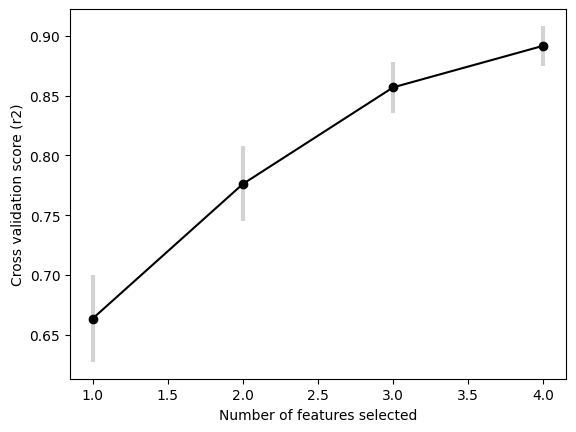

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate a dummy dataset
X, y = make_regression(n_samples=1000, n_features=6,
                       noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=['A', 'B', 'C', 'D', 'E', 'F'])
df['target'] = y

# Define the fixed features and the features to be eliminated
fixed_features = ['A', 'B']
elimination_features = ['C', 'D', 'E', 'F']

# Define a pipeline for the elimination features
elimination_pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('rfecv', RFECV(estimator=LinearRegression(), cv=5, scoring='r2'))
])

# Define a preprocessor that applies the elimination pipeline to the elimination features,
# and applies scaling to the fixed features
preprocessor = ColumnTransformer(transformers=[
    ('elim', elimination_pipeline, elimination_features),
    ('fix', StandardScaler(), fixed_features)
])

# Define the final pipeline that includes preprocessing and model training
pipeline = Pipeline(steps=[
    ('pre', preprocessor),
    ('reg', LinearRegression())
])

# Fit the pipeline to the all data
X_all = df[fixed_features + elimination_features]
y_all = df['target']

pipeline.fit(X_all, y_all)

# Access the selected features
selected_features_mask = pipeline.named_steps['pre'].transformers_[
    0][1].named_steps['rfecv'].support_
print(
    f'Selected features: {np.array(elimination_features)[selected_features_mask]}')

# Plot the R^2 score as a function of the number of selected features
num_features = range(1, len(pipeline.named_steps['pre'].transformers_[
                     0][1].named_steps['rfecv'].cv_results_['mean_test_score']) + 1)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")
plt.errorbar(num_features,
             pipeline.named_steps['pre'].transformers_[
                 0][1].named_steps['rfecv'].cv_results_['mean_test_score'],
             yerr=pipeline.named_steps['pre'].transformers_[
                 0][1].named_steps['rfecv'].cv_results_['std_test_score'],
             fmt='o-', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.show()

Optimal number of features : 4
['Tm' 'ideal_S' 'sigma_VEC' 'bulk_modulus']


AttributeError: 'RFECV' object has no attribute 'grid_scores_'

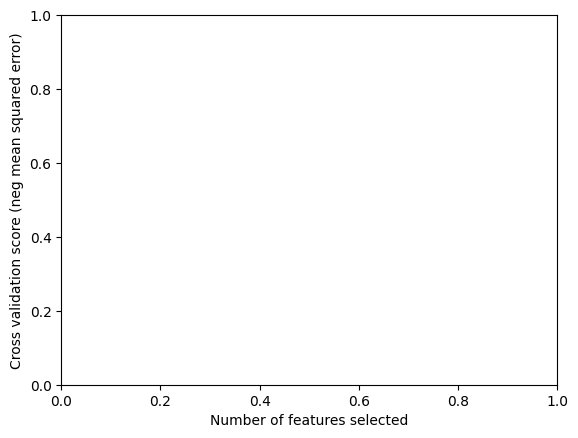

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

# Use the same features and subset
all_features_C = np.array(df_C_compo.columns.to_list(
) + df_C_specific_testing.columns.to_list() + df_C_specific_features.columns.to_list())
group_features_C = np.array(df_C_specific_features.columns.to_list())

group_indices_C = np.where(np.isin(all_features_C, group_features_C))[0]
X_C_norm_subset = X_C_norm[:, group_indices_C]

# Create the RFECV object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv_C = RFECV(estimator=forestmodel_C, step=1, cv=KFold(6),
                scoring='neg_mean_squared_error')

rfecv_C.fit(X_C_norm_subset, C2_norm.ravel())

print("Optimal number of features : %d" % rfecv_C.n_features_)

# Get a mask, or integer index, of the features selected
selected_features_C = rfecv_C.support_

# Get a list of the feature names selected
selected_feature_names = group_features_C[selected_features_C]
print(selected_feature_names)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (neg mean squared error)")
plt.plot(range(1, len(rfecv_C.grid_scores_) + 1), rfecv_C.grid_scores_)
plt.show()

>2 0.715 (0.043)
>3 0.814 (0.036)
>4 0.873 (0.030)
>5 0.887 (0.032)
>6 0.888 (0.027)
>7 0.889 (0.028)
>8 0.888 (0.032)
>9 0.885 (0.025)


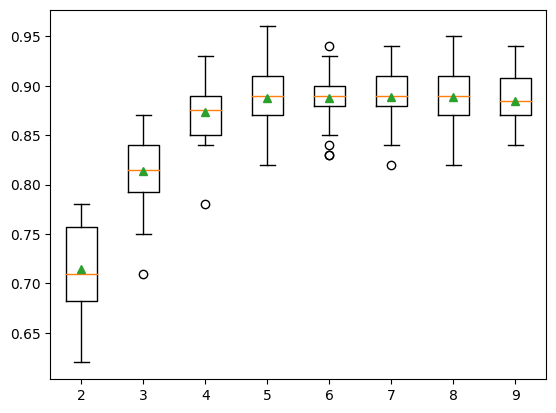

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset


def get_dataset():
    X, y = make_classification(
        n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y

# get a list of models to evaluate


def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models

# evaluate a give model using cross-validation


def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(
        model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()